In [1]:
import sys
sys.path.insert(0, '/Users/jisunan/myRepository/code-word2vec-application/analysis/05-alltogether/')
from groupcomparison_py3 import *

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def find_similar_words(myembed, seedword, k=10):
    myvec = myembed[seedword]
    wordlist = [seedword]
    myresult = myembed.closest(seedword, n=2)
    word_next = myresult[1][1]
    yourvec = myembed[word_next]
    wordlist.append(word_next)
    avg_vec = (myvec+yourvec)*0.5

    for i in range(0,k-1):
        myresult = myembed.closest_byvec(avg_vec, n=20)
        myvec = avg_vec
        for score, word in myresult:
            if word not in wordlist:
                yourvec = myembed[word]
                wordlist.append(word)
                avg_vec = (myvec+yourvec)*0.5
                break
    return wordlist

In [3]:
def pca_plot(name_A, name_B, embed_A, embed_B, set_A, set_B):
    
    myvecs = []
    for each_word in sorted(set_A):
        myvecs.append(embed_A[each_word])
    pca = PCA(n_components=2)
    X_pca_A = pca.fit(myvecs).transform(myvecs)

    myvecs = []
    for each_word in sorted(set_B):
        myvecs.append(embed_B[each_word])
    pca_B = PCA(n_components=2)
    X_pca_B = pca_B.fit(myvecs).transform(myvecs)

    print('Hillary Clinton:', set_A)
    print('Donald Trump:', set_B)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))
    fig.suptitle("%s" % (seedword.title()))
    ax1.scatter(X_pca_A[:, 0], X_pca_A[:, 1], alpha=0.2)
    for i, txt in enumerate(sorted(set_A)):
        ax1.annotate(txt, (X_pca_A[i, 0], X_pca_A[i, 1]))
        ax1.set_title(name_A)
    ax2.scatter(X_pca_B[:, 0], X_pca_B[:, 1], alpha=0.2)
    for i, txt in enumerate(sorted(set_B)):
        ax2.annotate(txt, (X_pca_B[i, 0], X_pca_B[i, 1]))
        ax2.set_title(name_B)
    # plt.title('PCA of dataset')
    plt.show()

In [4]:
name_base = "hillaryclinton"
name_other = "TheDonald"
base_path = "../05-alltogether/w2v_model/trained.%s.model.txt" % (name_base)
aligned_path = "../05-alltogether/w2v_model/aligned.%s_basedon_%s.model.txt" % (name_other, name_base)
isSgns = False
embed_A, embed_B = getEmbeds(base_path, aligned_path, isSgns)

In [5]:
seedwords = ['immigration', 'terror', 'energy', 'racial', 'economy', 'technology']

## 20 nearest words

---------------------------------------------------
immigration
Hillary Clinton: ['immigration', 'immigrants', 'protectionist', 'deportation', 'deporting', 'amnesty', 'enacting', 'implementing', 'health-care', 'homosexuality', 'implementation', 'banning', 'isolationism', 'undocumented', 'environmental', 'nafta', 'immigrant', 'trade', 'deportations', 'protectionism']
Donald Trump: ['immigration', 'migration', 'imigration', 'immigrants', 'immigrations', 'immigration-', 'immigration*', 'immigrantion', 'importation', 'emigration', 'crossings', 'immgrants', 'immigration**', 'deportations', 'immigrant', 'imigrants', 'immegrants', 'inmigration', 'migrations', 'integration']


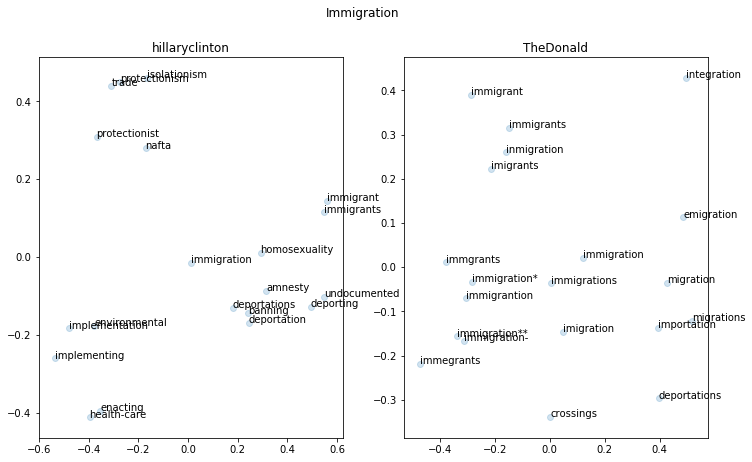

---------------------------------------------------
terror
Hillary Clinton: ['terror', 'terrorist', 'terrorists', 'terrorism', 'civilians', 'islamist', 'iranian', 'syrian', 'bombings', 'al-qaeda', 'mosul', 'bombing', 'isil', 'retaliation', 'perpetrators', 'atrocities', 'brussels', 'pearl', 'isis', 'saddam']
Donald Trump: ['terror', 'terrorist', 'terrorism', 'terrorists', 'jihadist', 'militants', 'jihadists', 'terroristic', 'terroist', 'isis', 'extremism', 'terrorism**', 'jihadism', 'massacres', 'jihadis', 'islamist', 'terrorism*', 'extremists', 'radicalization', '**radical']


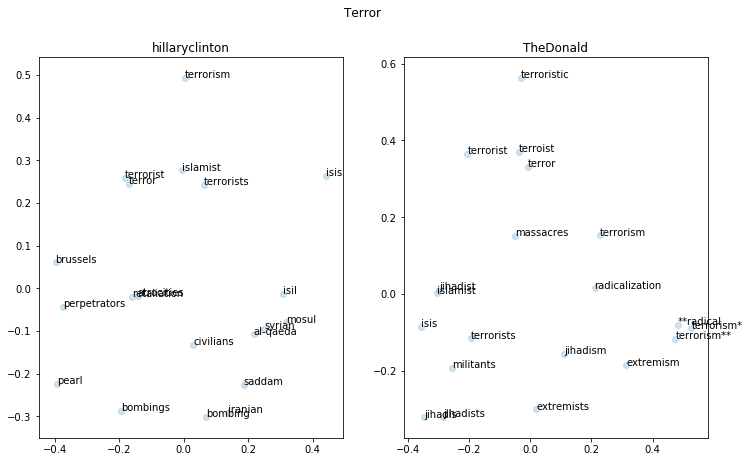

---------------------------------------------------
energy
Hillary Clinton: ['energy', 'energies', 'renewable', 'renewables', 'solar', 'cleaner', 'sustainable', 'coal', 'plants', 'resources', 'geothermal', 'fuels', 'infrastructure', 'technology', 'efficient', 'cookstoves', 'reactors', 'invest', 'efficiency', 'fracking']
Donald Trump: ['energy', 'energy**', 'energies', 'enery', 'enegry', 'engery', 'energy***', 'energy-', 'octane', 'enegy', 'voltage', 'fiving', 'fives', 'fived', 'cheekbones**', 'engergy', 'school/college', 'velocities', 'high-energy', 'unfavorables']


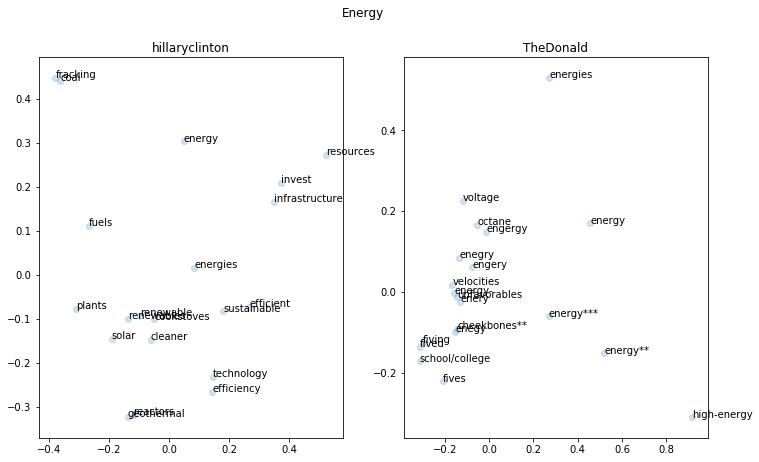

---------------------------------------------------
racial
Hillary Clinton: ['racial', 'systemic', 'classism', 'racism', 'profiling', 'prejudice', 'homophobia', 'cultural', 'discrimination', 'institutional', 'oppression', 'socioeconomic', 'institutionalized', 'ethnic', 'systematic', 'overt', 'disparities', 'societal', 'generational', 'xenophobia']
Donald Trump: ['racial', 'ethnic', 'racially', 'race-based', 'racism', 'separatism', 'racial/ethnic', 'race', 'epithets', 'divides', 'divisiveness', 'anti-white', 'discriminatory', 'institutional', 'scapegoating', 'whites', 'stereotyping', 'prejudice', 'systemic', 'disparities']


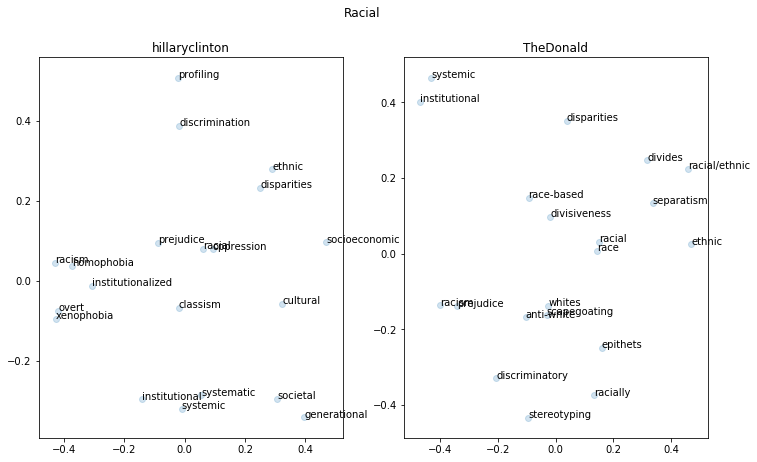

---------------------------------------------------
economy
Hillary Clinton: ['economy', 'economies', 'recession', 'sectors', 'tariffs', 'economic', 'manufacturing', 'growth', 'globalization', 'market', 'sector', 'productivity', 'gdp', 'nafta', 'prosperity', 'livelihoods', 'businesses', 'trade', 'stability', 'capitalism']
Donald Trump: ['economy', 'economies', 'economic', 'economically', 'infrastructure', 'competitiveness', 'markets', 'market', 'exports', 'industries', 'sectors', 'recession', 'gdp', 'manufacturing', 'trade', 'protectionism', 'currency', 'productivity', 'debt', 'economical']


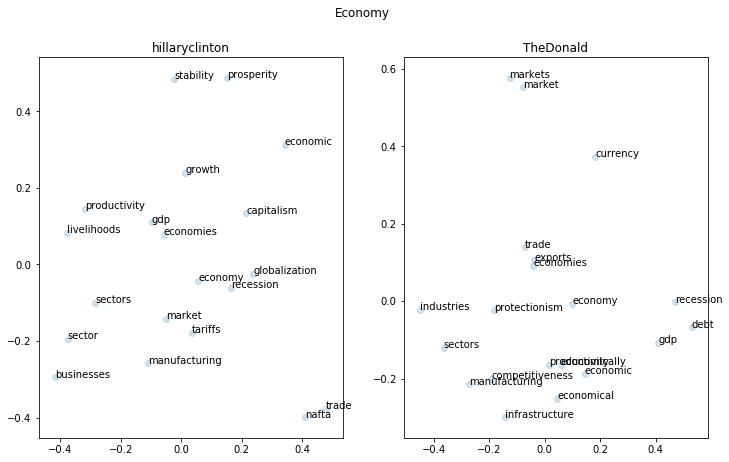

---------------------------------------------------
technology
Hillary Clinton: ['technology', 'technologies', 'innovation', 'technological', 'reactors', 'techniques', 'automation', 'efficiency', 'efficient', 'medicines', 'engineers', 'renewables', 'development', 'equipment', 'storage', 'sustainable', 'developing', 'tech', 'tools', 'electricity']
Donald Trump: ['technology', 'technologies', 'technological', 'innovations', 'tech', 'advancements', 'robotics', 'innovation', 'advanced', 'capabilities', 'hardware', 'computing', 'reactors', 'systems', 'breakthroughs', 'weaponry', 'electronics', 'renewables', 'technologically', 'avionics']


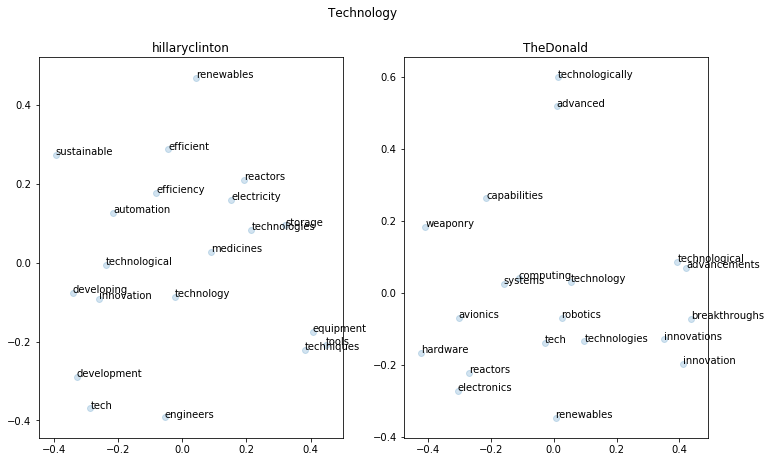

In [6]:
for seedword in seedwords:
    print("---------------------------------------------------")
    print(seedword)
    set_A = [term[1] for term in embed_A.closest(seedword, 20)]
    set_B = [term[1] for term in embed_B.closest(seedword, 20)]
    pca_plot(name_base, name_other, embed_A, embed_B, set_A, set_B)

## 20 "similar words" by average vector method

---------------------------------------------------
immigration
Hillary Clinton: ['immigration', 'immigrants', 'undocumented', 'deporting', 'illegals', 'mexicans', 'rapists', 'murderers', 'criminals', 'dealers', 'cartels', 'addicts', 'gangs', 'heroin', 'drugs', 'drug', 'prescription', 'addiction', 'opioid', 'epidemic', 'hiv']
Donald Trump: ['immigration', 'migration', 'imigration', 'immigrations', 'immigration-', 'immigration*', 'immegrants', 'immigrants**', 'immigrants*', 'aliens*', 'aliens**', 'alien**', 'immigrant*', 'immigrant**', '~~undocumented~~', 'immigration**', 'immgrants', 'immigrantion', 'immagrants', 'immigrants', 'immigrant']


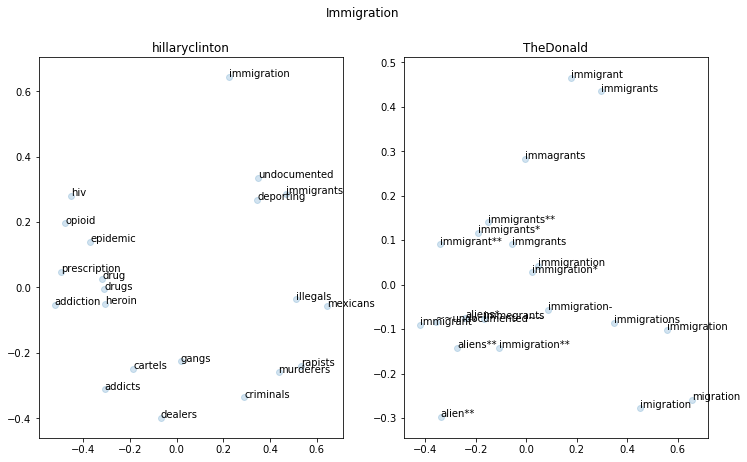

---------------------------------------------------
terror
Hillary Clinton: ['terror', 'terrorist', 'terrorists', 'civilians', 'innocents', 'soldiers', 'iraqi', 'libyan', 'iranian', 'kurds', 'kurdish', 'sunni', 'al-qaeda', 'rebels', 'syrian', 'assad', 'gaddafi', 'saddam', 'hussein', 'wmds', 'afghanistan']
Donald Trump: ['terror', 'terrorist', 'terrorism', 'terrorists', 'jihadists', 'jihadis', 'militants', 'jihadist', 'islamist', 'islamists', 'islamics', 'muslims', 'islam', 'islams', 'islamism', 'jihadism', 'radicalism', 'extremism', 'fundamentalism', 'fundamentalists', 'extremists']


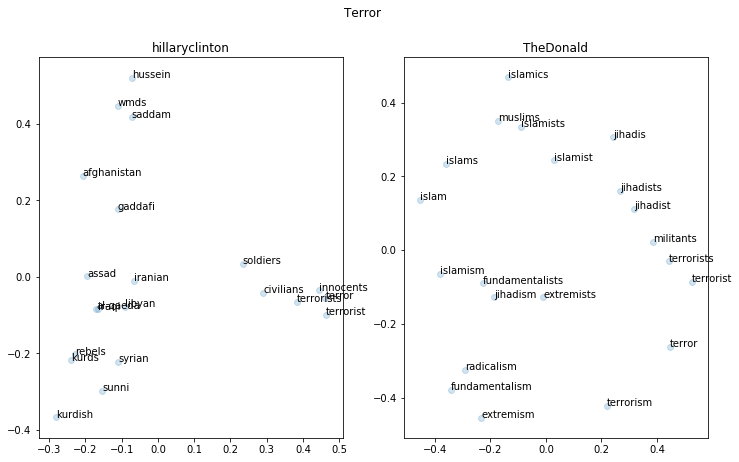

---------------------------------------------------
energy
Hillary Clinton: ['energy', 'energies', 'renewables', 'renewable', 'geothermal', 'cleaner', 'solar', 'grid', 'reactors', 'reactor', 'plants', 'technologies', 'technology', 'innovation', 'technological', 'efficiency', 'output', 'emissions', 'co2', 'greenhouse', 'methane']
Donald Trump: ['energy', 'energy**', 'energy***', 'engery', 'enery', 'enegry', 'energy-', 'fiving', 'fived', 'school/college', 'fives', 'kite', 'enegy', 'energy༽つ', 'cheekbones**', 'energyyyyy', 'probablity', 'octane', 'voltage', 'fructose', 'heeled']


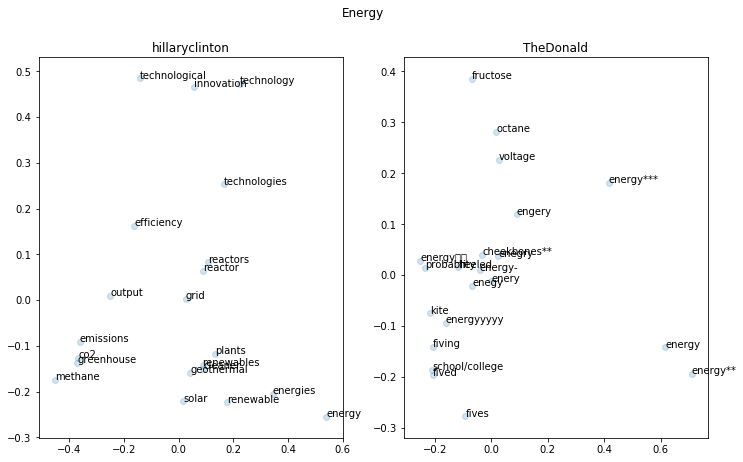

---------------------------------------------------
racial
Hillary Clinton: ['racial', 'systemic', 'institutional', 'systematic', 'structural', 'societal', 'inherent', 'underlying', 'fundamental', 'complexity', 'complexities', 'nuances', 'nuance', 'nuanced', 'depth', 'breadth', 'competence', 'intellect', 'tenacity', 'resilience', 'perseverance']
Donald Trump: ['racial', 'ethnic', 'ethnicity', 'nationality', 'caucasian', 'mestizo', 'mestizos', 'amerindian', 'spaniards', 'aztecs', 'conquistadors', 'mayans', 'celts', 'germanic', 'celtic', 'slavic', 'turkic', 'indo-european', 'portuguese', 'iberians', 'anglos']


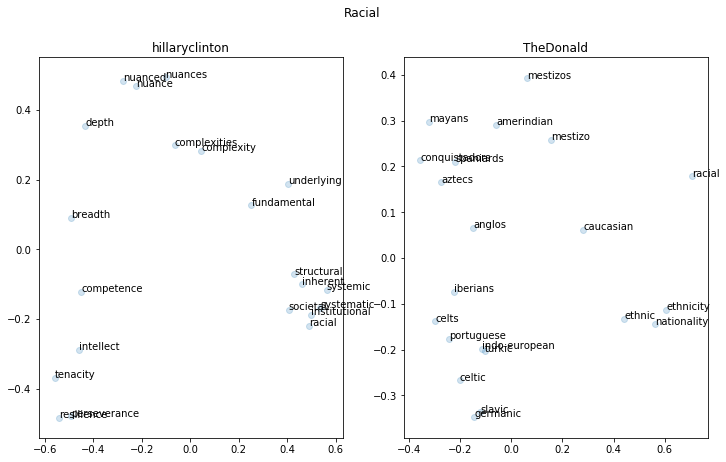

---------------------------------------------------
economy
Hillary Clinton: ['economy', 'economies', 'tariffs', 'exports', 'imports', 'tariff', 'goods', 'consumers', 'products', 'profits', 'stocks', 'investors', 'investments', 'assets', 'properties', 'mortgages', 'mortgage', 'lenders', 'securities', 'derivatives', 'subprime']
Donald Trump: ['economy', 'economies', 'markets', 'market', 'marketplace', 'pricing', 'prices', 'costs', 'cost', 'expensive', 'cheaper', 'cheap', 'inexpensive', 'cheaply', 'electronics', 'hardware', 'equipment', 'upgrades', 'upgrading', 'upgrade', 'upgraded']


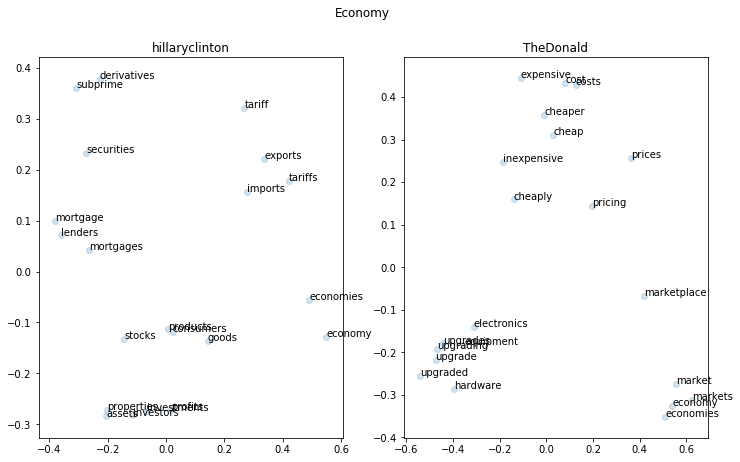

---------------------------------------------------
technology
Hillary Clinton: ['technology', 'technologies', 'reactors', 'reactor', 'plants', 'renewables', 'renewable', 'geothermal', 'grid', 'solar', 'turbines', 'greenhouse', 'emissions', 'co2', 'methane', 'pollution', 'extraction', 'shale', 'phasing', 'mining', 'revitalizing']
Donald Trump: ['technology', 'technologies', 'innovations', 'advancements', 'breakthroughs', 'discoveries', 'advances', 'advancement', 'technological', 'innovation', 'ingenuity', 'entrepreneurship', 'competitiveness', 'productivity', 'efficiency', 'output', 'emissions', 'emission', 'c02', 'co2', 'greenhouse']


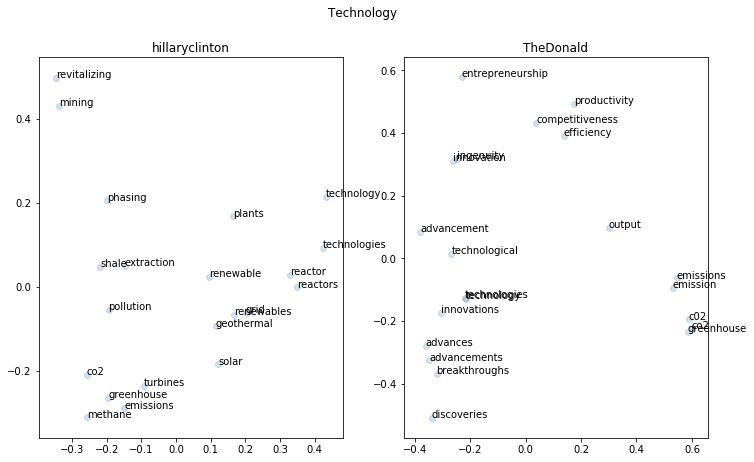

In [7]:
for seedword in seedwords:
    print("---------------------------------------------------")
    print(seedword)
    set_A = (find_similar_words(embed_A, seedword, 20))
    set_B = (find_similar_words(embed_B, seedword, 20))
    pca_plot(name_base, name_other, embed_A, embed_B, set_A, set_B)

## 10 nearest words of 5 similar words by average vector method

---------------------------------------------------
immigration
Hillary Clinton: dict_keys(['immigration', 'immigrants', 'protectionist', 'deportation', 'deporting', 'amnesty', 'enacting', 'implementing', 'health-care', 'homosexuality', 'undocumented', 'illegals', 'immigrant', 'mexicans', 'refugees', 'migrants', 'muslims', 'rapists', 'deported', 'deport', 'visas', 'h1b', 'banning', 'immigrating', 'criminals', 'murderers', 'mexican', 'blacks'])
Donald Trump: dict_keys(['immigration', 'migration', 'imigration', 'immigrants', 'immigrations', 'immigration-', 'immigration*', 'immigrantion', 'importation', 'emigration', 'migrations', 'influx', 'migrant', 'integration', 'immegrants', 'crossings', 'immigrants**', 'immigration**', 'immgrants', 'aliens*', 'immigrants*', 'immigrant**'])


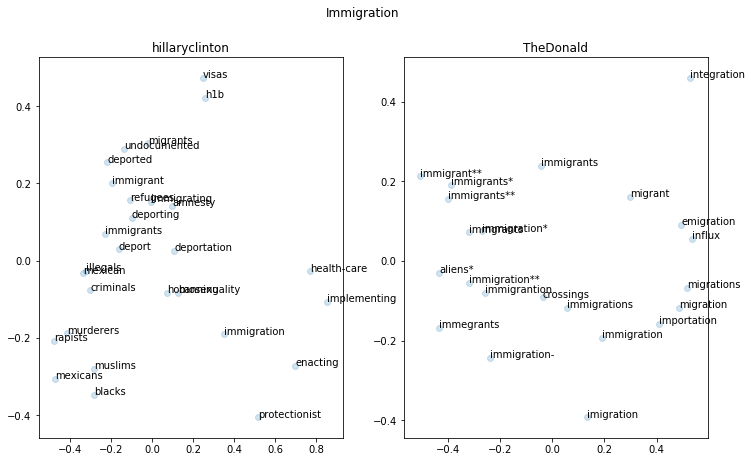

---------------------------------------------------
terror
Hillary Clinton: dict_keys(['terror', 'terrorist', 'terrorists', 'terrorism', 'civilians', 'islamist', 'iranian', 'syrian', 'bombings', 'al-qaeda', 'brussels', 'bombing', 'torture', 'criminals', 'isis', 'soldiers', 'innocents', 'civilian', 'casualties', 'iraqi', 'libyan', 'killings', 'atrocities', 'untold', 'senseless', 'servicemen', 'troops', 'soldier', 'sailors', 'gaddafi'])
Donald Trump: dict_keys(['terror', 'terrorist', 'terrorism', 'terrorists', 'jihadist', 'militants', 'jihadists', 'terroristic', 'terroist', 'isis', 'extremist', 'islamist', 'extremism', 'terrorism**', 'jihadism', '**radical', 'radicalization', 'radical', 'jihadis', 'extremists', 'islamists', 'insurgents', 'muslims', 'radicals', 'islamics'])


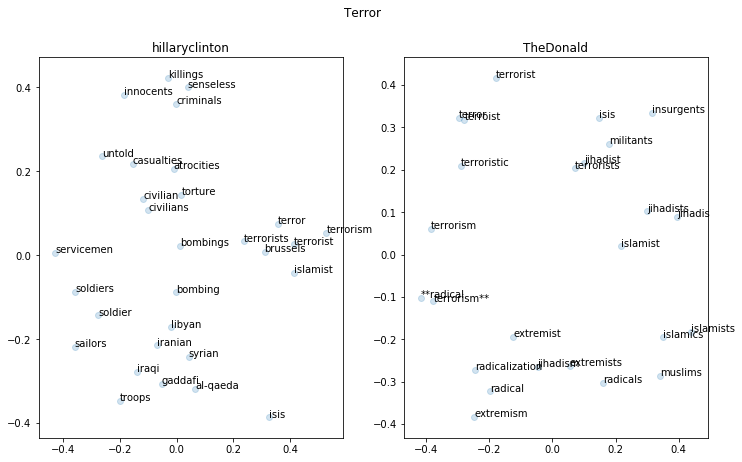

---------------------------------------------------
energy
Hillary Clinton: dict_keys(['energy', 'energies', 'renewable', 'renewables', 'solar', 'cleaner', 'sustainable', 'coal', 'plants', 'resources', 'geothermal', 'grid', 'technologies', 'infrastructure', 'emissions', 'greenhouse', 'reactors', 'fuels', 'hydroelectric', 'extraction', 'hydro', 'com/briefing/factsheets/2016/02/02/advanced-buildings/', 'co2', 'efficient', 'pollution', 'mining'])
Donald Trump: dict_keys(['energy', 'energy**', 'energies', 'enery', 'enegry', 'engery', 'energy***', 'energy-', 'octane', 'enegy', 'quality**', 'five**', 'cheekbones**', '**energy**', '**energy', 'fiving', 'voltage', 'fived', 'school/college', 'energyyyyy', 'energy༽つ'])


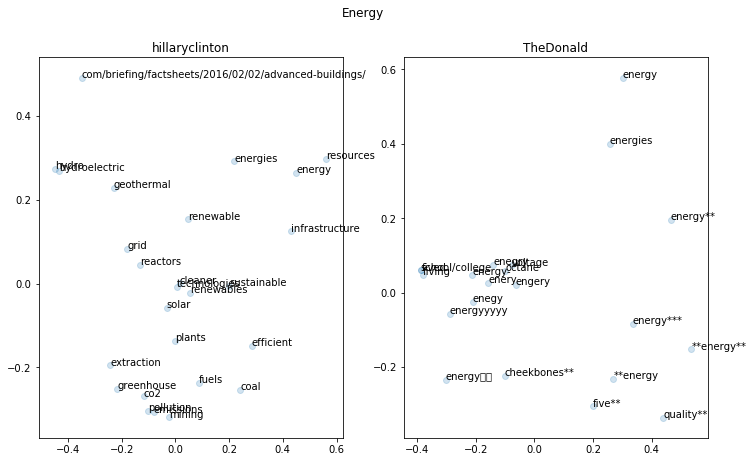

---------------------------------------------------
racial
Hillary Clinton: dict_keys(['racial', 'systemic', 'classism', 'racism', 'profiling', 'prejudice', 'homophobia', 'cultural', 'discrimination', 'institutional', 'systematic', 'structural', 'inherent', 'societal', 'underlying', 'institutionalized', 'overt', 'xenophobia', 'widespread', 'technological', 'organizational', 'oppression', 'psychological'])
Donald Trump: dict_keys(['racial', 'ethnic', 'racially', 'race-based', 'racism', 'separatism', 'racial/ethnic', 'race', 'epithets', 'divides', 'ethnoreligious', 'ethnicity', 'ethnically', 'ethnicities', 'homogeneity', 'germanic', 'ethnic/religious', 'nationality', 'caucasian', 'race/ethnicity', 'heritage', 'ancestry', 'caucasoid', 'mestizo', 'origin', 'creed', 'nationalities', 'caucasians', 'asian', 'non-white', 'mestizos', 'anglo-saxon', 'hispanic', 'amerindian', 'non-mexican', 'spaniard', 'spaniards', 'amerindians', 'hispanic/latino'])


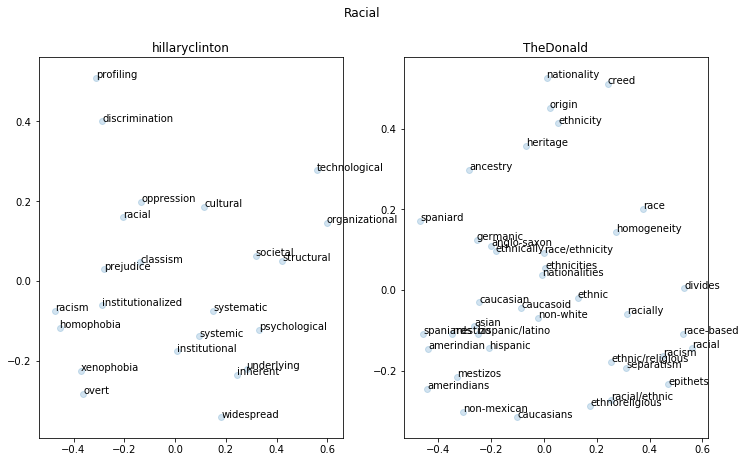

---------------------------------------------------
economy
Hillary Clinton: dict_keys(['economy', 'economies', 'recession', 'sectors', 'tariffs', 'economic', 'manufacturing', 'growth', 'globalization', 'market', 'regions', 'developing', 'agricultural', 'exports', 'governments', 'farming', 'globally', 'imports', 'tariff', 'emissions', 'goods', 'agreements', 'export', 'prices', 'bonds', 'import', 'importing', 'exporting', 'offshore', 'gdp', 'greenhouse'])
Donald Trump: dict_keys(['economy', 'economies', 'economic', 'economically', 'infrastructure', 'competitiveness', 'markets', 'market', 'exports', 'industries', 'currencies', 'nations', 'governments', 'stocks', 'commodities', 'traders', 'marketplace', 'derivatives', 'prices', 'oversupply', 'pricing', 'insurers', 'competition', 'consumers', 'monopolies', 'free-market', 'providers', 'pharmaceuticals', 'availability', 'suppliers', 'generics', 'consumer', 'subsidy', 'costs'])


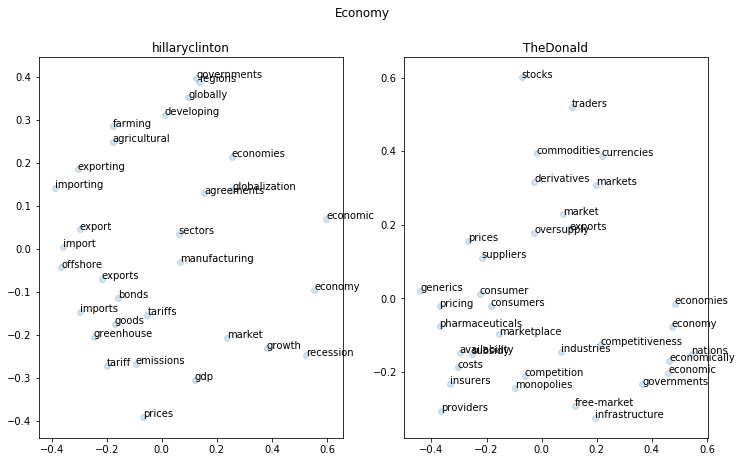

---------------------------------------------------
technology
Hillary Clinton: dict_keys(['technology', 'technologies', 'innovation', 'technological', 'reactors', 'techniques', 'automation', 'efficiency', 'efficient', 'medicines', 'renewables', 'reactor', 'plants', 'equipment', 'grid', 'storage', 'nrc', 'batteries', 'thorium', 'arsenal', 'missiles', 'submarines', 'aircraft', 'solar', 'renewable', 'emissions', 'greenhouse', 'geothermal', 'cleaner'])
Donald Trump: dict_keys(['technology', 'technologies', 'technological', 'innovations', 'tech', 'advancements', 'robotics', 'innovation', 'advanced', 'capabilities', 'industries', 'renewables', 'reactors', 'designs', 'sectors', 'inventions', 'breakthroughs', 'discoveries', 'advances', 'advancement', 'improvements', 'breakthrough', 'developments', 'discovery', 'journals'])


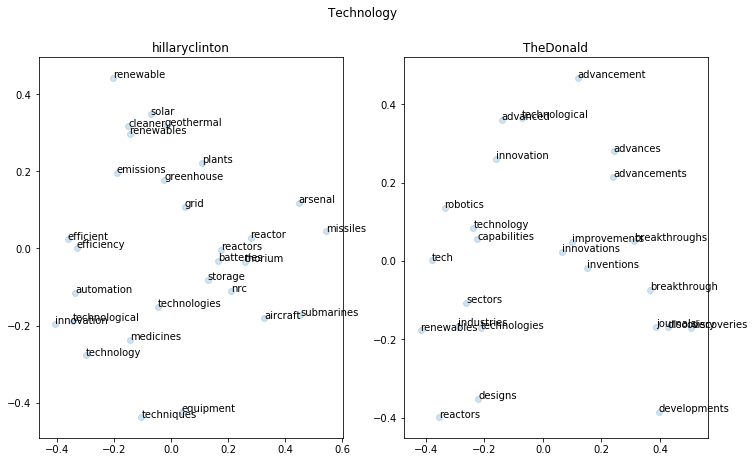

In [8]:
for seedword in seedwords:
    print("---------------------------------------------------")
    print(seedword)

    similar_words_A = (find_similar_words(embed_A, seedword, 5))
    set_A = {}
    for each_word in similar_words_A:
        for term in embed_A.closest(each_word, 10):
            set_A[term[1]] = 1

    similar_words_B = (find_similar_words(embed_B, seedword, 5))
    set_B = {}
    for each_word in similar_words_B:
        for term in embed_B.closest(each_word, 10):
            set_B[term[1]] = 1

    pca_plot(name_base, name_other, embed_A, embed_B, set_A.keys(), set_B.keys())